

```
# This is formatted as code
```

#Student Name: Abhinav Kaushal Keshari
#ECE 595 Introduction to Deep Learning
#Project 1: CLDNN - Student Code

In [2]:
#Import necessary packages
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import _pickle as cPickle

#Part 0: Importing and normalizing data

4431872/4422102 [==============================] - 0s 0us/step


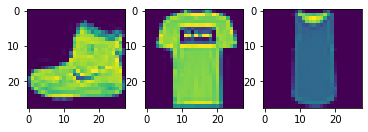

In [ ]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

# Checking few of the test images
fig, (ax, bx, cx) = plt.subplots(1,3)
ax.imshow(data_train[0])
bx.imshow(data_train[1])
cx.imshow(data_train[2])

data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000, 10) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

#Part 1: Plotting cross entropy

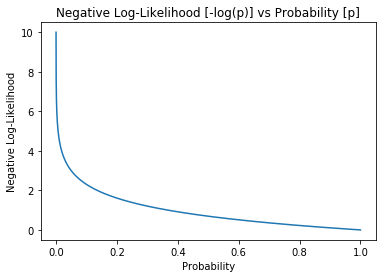

In [ ]:
#Show cross-entropy loss function
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
import math

func = lambda x: -math.log(x)
fig, ax = plt.subplots()
xcoord=[]
ycoord=[]
xcoord.append(0)
ycoord.append(np.inf)

for x in np.linspace(math.exp(-10),1,1000000):
  y = func(x)
  xcoord.append(x)
  ycoord.append(y)

plt.title('Negative Log-Likelihood [-log(p)] vs Probability [p]')
plt.plot(xcoord, ycoord)
plt.ylabel('Negative Log-Likelihood')
plt.xlabel('Probability')
plt.show()


Answer the following questions:


1.   How is the the negative log-likelihood of p affected when p is small? How about when p is large?

  ANS: 
  
  As p defines the probability distribution we have $p \in [0,1]$. 
  *     When p gets small or $p ->0$ negative-log-likelihood tends to get very large and approaches infinity, i.e $-log(p) -> \infty$. The gradient starts to saturate.
  *   When p gets large or $p ->1$ negative-log-likelihood tends to approach 0, i.e $-log(p) -> 0$. The gradient starts to saturate.



2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  ANS: 
 
  *   Negative log-likelihood represents the likelihood of the obtained output being correct provided a given input. As it tends to get very large when the confidence of the output is small and thus we have a high loss value. Whereas, when the condifence of the output being correct gets close to 1, the function tends to have a loss approaching 0. 
  *   For representing this behaviour the function takes input in the range [0,1] which ideally represents the probability space. Thus, it fits very well for such scenarios.


    
     




#Part 2: Overfit CNN

In [ ]:
n = 28 #Image dimension is 28x28
num_channels = 1
num_classes = 10
#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    
    #First Layer - 2D Convolution layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256,(3,3), activation='relu', input_shape=(n, n, num_channels)))

    #Second Layer - 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None))

    #Third Layer - 2D convolution layer with 128 feature maps and a 3x3 filter
    model.add(Conv2D(128, (3,3), activation='relu'))

    #Fourth Layer - 2D MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None))

    #Fifth Layer - Faltten data for input to Dense layers
    model.add(Flatten())

    #Sixth Layer - Dense layer with 100 perceptrons
    model.add(Dense(100, activation='relu', kernel_initializer="normal"))

    #Seventh Layer - Dense layer with 100 perceptrons
    model.add(Dense(100, activation='relu', kernel_initializer="normal"))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation='softmax'))

    return model

#Create instance of CNN model graph
CNN_overfit = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
CNN_overfit.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_model_metadata = CNN_overfit.fit(data_train, labels_train,
                                     validation_data=(data_test, labels_test),
                                     epochs=200,
                                     batch_size=1024,
                                     shuffle=True)

#Print accuracy of model on testing set after training 
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Part2.1 Testing Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/200
59/59 [==============================] - 4s 53ms/step - loss: 1.0855 - accuracy: 0.6055 - val_loss: 0.7148 - val_accuracy: 0.6883
Epoch 2/200
59/59 [==============================] - 3s 50ms/step - loss: 0.5898 - accuracy: 0.7740 - val_loss: 0.5056 - val_accuracy: 0.8026
Epoch 3/200
59/59 [==============================] - 3s 50ms/step - loss: 0.4750 - accuracy: 0.8249 - val_loss: 0.5038 - val_accuracy: 0.8159
Epoch 4/200
59/59 [==============================] - 3s 50ms/step - loss: 0.4091 - accuracy: 0.8499 - val_loss: 0.3832 - val_accuracy: 0.8606
Epoch 5/200
59/59 [==============================] - 3s 50ms/step - loss: 0.3656 - accuracy: 0.8637 - val_loss: 0.3845 - val_accuracy: 0.8605
Epoch 6/200
59/59 [==============================] - 3s 50ms/step - loss: 0.3302 - accuracy: 0.8779 - val_loss: 0.3511 - val_accuracy: 0.8734
Epoch 7/200
59/59 [==============================] - 3s 50ms/step - loss: 0.3071 - accuracy: 0.8870 - val_loss: 0.3256 - val_accuracy: 0.8812
Epoch 

Part 2.2


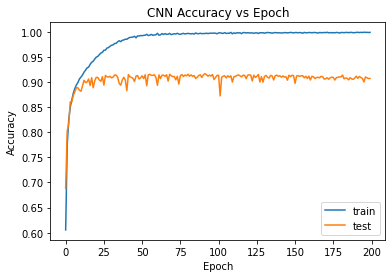

In [ ]:
#Plot accuracy vs epoch
plt.title('CNN Accuracy vs Epoch')
plt.plot(CNN_model_metadata.history['accuracy']) #Plot the training accuracy
plt.plot(CNN_model_metadata.history['val_accuracy']) #Plot the testing accuracy
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
print("Part 2.2")
plt.show()


Part 2.3


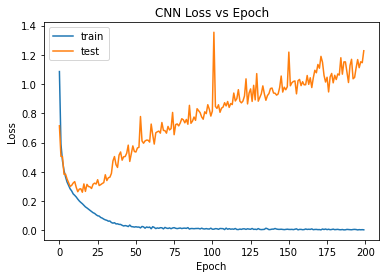

In [ ]:
#Plot loss vs epoch
plt.title('CNN Loss vs Epoch')
plt.plot(CNN_model_metadata.history['loss']) #Plot the training loss
plt.plot(CNN_model_metadata.history['val_loss']) #Plot the testing loss
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
print("Part 2.3")
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: Loss of the training set approaches zero as we increase the number of epochs.

2.   What does the loss of the testing set go to? 

  ANS: Loss of the testing set first decreases to around 0.263 as minimum at epoch 20, but then starts to increase with further epochs and reaches around 1.2.
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS: Our model runs for 200 epochs and is able to overlearn or overfit the training data. This causes the loss to keep on decreasing for training. Whereas as our model fails to generalise well enough the testing loss starts to increase with increasing epoch. 

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: Testing accuracy remains low due to our model failing to generalize and instead leading to overfitting. Few ways to avoid this are:

  - Regularization - Forcing our model to be simpler
  - Cross Validation - Helps in tuning the hyper parameters
  - Stopping early - Stopping the training of our model after the epoch when we start seeing the testing loss increase.

#Part 3: Dropout on input layer

In [ ]:
n = 28 #Image dimension is 28x28
num_channels = 1
num_classes = 10
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()

    #Dropout of 30% at the input layer
    model.add(Dropout(0.3))

    #First Layer - 2D Convolution layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256,(3,3), activation='relu', input_shape=(n, n, num_channels)))

    #Second Layer - 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None))

    #Third Layer - 2D convolution layer with 128 feature maps and a 3x3 filter
    model.add(Conv2D(128, (3,3), activation='relu'))

    #Fourth Layer - 2D MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None))

    #Fifth Layer - Faltten data for input to Dense layers
    model.add(Flatten())

    #Sixth Layer - Dense layer with 100 perceptrons
    model.add(Dense(100, activation='relu', kernel_initializer="normal"))

    #Seventh Layer - Dense layer with 100 perceptrons
    model.add(Dense(100, activation='relu', kernel_initializer="normal"))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

#Create instance of CNN model graph
CNN_dropout_in = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_in.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_in_metadata = CNN_dropout_in.fit(data_train, labels_train,
                                             validation_data=(data_test, labels_test),
                                             epochs=200,
                                             batch_size=1024,
                                             shuffle=True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_in.evaluate(data_test, labels_test)
print("Part3.1 Testing Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 13s 211us/step - loss: 1.1259 - accuracy: 0.5800 - val_loss: 0.7688 - val_accuracy: 0.7358
Epoch 2/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.6320 - accuracy: 0.7554 - val_loss: 0.6195 - val_accuracy: 0.7749
Epoch 3/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.5333 - accuracy: 0.7958 - val_loss: 0.5437 - val_accuracy: 0.7982
Epoch 4/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.4764 - accuracy: 0.8200 - val_loss: 0.5151 - val_accuracy: 0.8137
Epoch 5/200
60000/60000 [==============================] - 11s 189us/step - loss: 0.4349 - accuracy: 0.8354 - val_loss: 0.4699 - val_accuracy: 0.8376
Epoch 6/200
60000/60000 [==============================] - 11s 189us/step - loss: 0.4052 - accuracy: 0.8462 - val_loss: 0.4777 - val_accuracy: 0.8263
Epoch 7/200
60000/60000 [=========================

Part 3.2


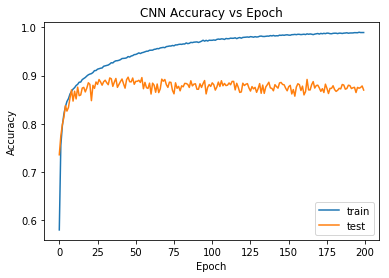

In [ ]:
#Plot accuracy vs epoch
plt.title('CNN Accuracy vs Epoch')
plt.plot(CNN_dropout_in_metadata.history['accuracy']) #Plot the training accuracy
plt.plot(CNN_dropout_in_metadata.history['val_accuracy']) #Plot the testing accuracy
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
print("Part 3.2")
plt.show()

Part 3.3


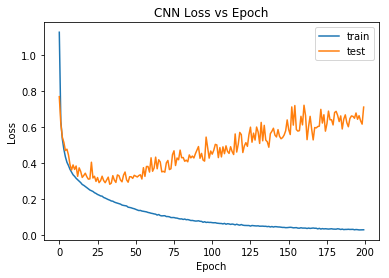

In [ ]:
#Plot loss vs epoch
plt.title('CNN Loss vs Epoch')
plt.plot(CNN_dropout_in_metadata.history['loss']) #Plot the training loss
plt.plot(CNN_dropout_in_metadata.history['val_loss']) #Plot the testing loss
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
print("Part 3.3")
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: Loss of training set approches 0 with increase in epoch.
  
2.   What does the loss of the testing set go to? 

  ANS: Testing loss reduces to lowest value of 0.2895 near epoch 35 and then starts to increase to about 0.7 by end of 200 epoch.

3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  ANS: Adding dropout in input layer behaves like removing data from our training which might instead make our model suffer from missing some useful information. This is why the loss in testing starts to increase which is quite opposite of training loss which approaches 0.

#Part 4-I: Dropout on Hidden Layers

In [ ]:
n = 28 #Image dimension is 28x28
num_channels = 1
num_classes = 10

#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()

    #First Layer - 2D Convolution layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256,(3,3), activation='relu', input_shape=(n, n, num_channels)))

    #Dropout of 30% after the first hidden (first convolution) layer 
    model.add(Dropout(0.3))

    #Second Layer - 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None))

    #Third Layer - 2D Convolution layer with 128 feature maps and a 3x3 filter
    model.add(Conv2D(128,(3,3), activation='relu'))

    #Dropout of 30% after the third hidden (second convolution) layer
    model.add(Dropout(0.3))

    #Fourth Layer - 2D MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None))

    #Fifth Layer - Flatten data for input to Dense layers
    model.add(Flatten())

    #Sixth Layer - Dense layer with 100 perceptrons
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))

    #Seventh Layer - Dense layer with 100 perceptrons
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

#Create instance of CNN model graph
CNN_dropout_hidden = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_hidden.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_metadata = CNN_dropout_hidden.fit(data_train, labels_train,
                                              validation_data=(data_test, labels_test),
                                              epochs=200,
                                              batch_size=1024,
                                              shuffle=True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Part4.1 Testing Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 20s 330us/step - loss: 1.0261 - accuracy: 0.6209 - val_loss: 0.7794 - val_accuracy: 0.7253
Epoch 2/200
60000/60000 [==============================] - 20s 327us/step - loss: 0.5715 - accuracy: 0.7820 - val_loss: 0.5557 - val_accuracy: 0.8116
Epoch 3/200
60000/60000 [==============================] - 20s 327us/step - loss: 0.4688 - accuracy: 0.8229 - val_loss: 0.5307 - val_accuracy: 0.8252
Epoch 4/200
60000/60000 [==============================] - 20s 327us/step - loss: 0.4004 - accuracy: 0.8495 - val_loss: 0.4773 - val_accuracy: 0.8428
Epoch 5/200
60000/60000 [==============================] - 20s 327us/step - loss: 0.3617 - accuracy: 0.8663 - val_loss: 0.4224 - val_accuracy: 0.8634
Epoch 6/200
60000/60000 [==============================] - 20s 327us/step - loss: 0.3282 - accuracy: 0.8768 - val_loss: 0.3688 - val_accuracy: 0.8817
Epoch 7/200
60000/60000 [=========================

Part 4.2


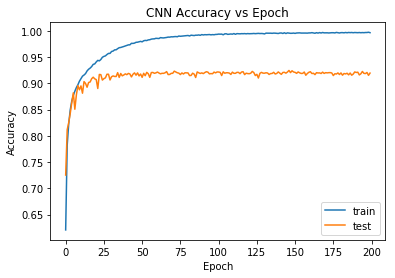

In [ ]:
#Plot accuracy vs epoch
plt.title('CNN Accuracy vs Epoch')
plt.plot(CNN_dropout_metadata.history['accuracy']) #Plot the training accuracy
plt.plot(CNN_dropout_metadata.history['val_accuracy']) #Plot the testing accuracy
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
print("Part 4.2")
plt.show()

Part 4.3


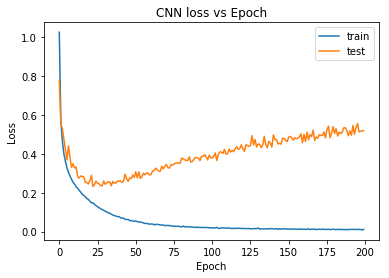

In [ ]:
#Plot loss vs epoch
plt.title('CNN loss vs Epoch')
plt.plot(CNN_dropout_metadata.history['loss']) #Plot the training accuracy
plt.plot(CNN_dropout_metadata.history['val_loss']) #Plot the testing accuracy
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
print("Part 4.3")
plt.show()


Answer the following questions:



1.   What does the loss of the training set go to? 

  ANS: Loss of training set approaches 0 with increase in epochs.
  
2.   What does the loss of the testing set go to? 

  ANS:  Testing loss goes to a minimum of around 0.2323 and then starts to increase slightly to around 0.5 by end of 200 epochs.

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: We observe a better accuracy and lower loss in test data in this architecture compared to the one in Part 3. Dropout in hidden layer allows us to perform regularization as we try to train different network layout for each training iteration. Here we are reducing the parameters trying to make our hypothesis simpler.
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: Training accuracy reaches 99.62 and testing accuracy gets quite close to it being 91.93 after 200 epochs. It is a good fit to be a model for this data though their are better models present now with accuracy around 96%.

#Part 4-II [Sub-Question 5]: Dropout on Input and Hidden Layers

In [ ]:
n = 28 #Image dimension is 28x28
num_channels = 1
num_classes = 10
#Create and train model architecture
def CNN_dropout_both():
    model = Sequential()

    #Dropout of 30% at the input layer
    model.add(Dropout(0.3))
    
    #First Layer - 2D Convolution layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256,(3,3), activation='relu', input_shape=(n, n, num_channels)))

    #Dropout of 30% after the first hidden (first convolution) layer 
    model.add(Dropout(0.3))

    #Second Layer - 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None))

    #Third Layer - 2D Convolution layer with 128 feature maps and a 3x3 filter
    model.add(Conv2D(128,(3,3), activation='relu'))

    #Dropout of 30% after the third hidden (second convolution) layer
    model.add(Dropout(0.3))

    #Fourth Layer - 2D MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None))

    #Fifth Layer - Flatten data for input to Dense layers
    model.add(Flatten())

    #Sixth Layer - Dense layer with 100 perceptrons
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))

    #Seventh Layer - Dense layer with 100 perceptrons
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation='softmax'))
    
    
    return model


#Create instance of CNN model graph
CNN_dropout_both = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_both_metadata = CNN_dropout_both.fit(data_train, labels_train,
                                                 validation_data=(data_test, labels_test),
                                                 epochs=200,
                                                 batch_size=1024,
                                                 shuffle=True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_both.evaluate(data_test, labels_test)
print("Part4.5 Testing Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 20s 331us/step - loss: 1.1354 - accuracy: 0.5843 - val_loss: 1.0421 - val_accuracy: 0.6617
Epoch 2/200
60000/60000 [==============================] - 20s 327us/step - loss: 0.6444 - accuracy: 0.7491 - val_loss: 0.7600 - val_accuracy: 0.7552
Epoch 3/200
60000/60000 [==============================] - 20s 325us/step - loss: 0.5357 - accuracy: 0.7936 - val_loss: 0.6828 - val_accuracy: 0.7975
Epoch 4/200
60000/60000 [==============================] - 19s 324us/step - loss: 0.4763 - accuracy: 0.8189 - val_loss: 0.5544 - val_accuracy: 0.8336
Epoch 5/200
60000/60000 [==============================] - 20s 326us/step - loss: 0.4371 - accuracy: 0.8350 - val_loss: 0.5770 - val_accuracy: 0.8321
Epoch 6/200
60000/60000 [==============================] - 20s 326us/step - loss: 0.4071 - accuracy: 0.8461 - val_loss: 0.5149 - val_accuracy: 0.8403
Epoch 7/200
60000/60000 [=========================

Part 4.5


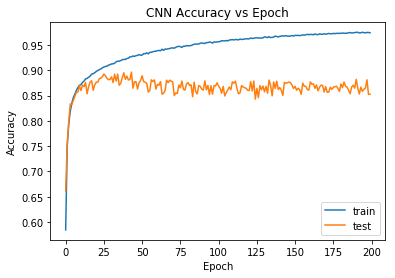

In [ ]:
#Plot accuracy vs epoch
plt.title('CNN Accuracy vs Epoch')
plt.plot(CNN_dropout_both_metadata.history['accuracy']) #Plot the training accuracy
plt.plot(CNN_dropout_both_metadata.history['val_accuracy']) #Plot the testing accuracy
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
print("Part 4.5")
plt.show()

Part 4.5


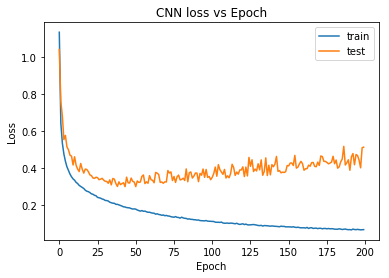

In [ ]:
#Plot loss vs epoch
plt.title('CNN loss vs Epoch')
plt.plot(CNN_dropout_both_metadata.history['loss']) #Plot the training accuracy
plt.plot(CNN_dropout_both_metadata.history['val_loss']) #Plot the testing accuracy
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
print("Part 4.5")
plt.show()

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: Training loss is 0.0671 after 200 epochs or approaches 0.
  
2.   What does the loss of the testing set go to? 

  ANS: Testing loss decreased to a minimum of 0.3 by epoch 50 then starts to increase to around 0.35 by end of 200 epochs.
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: Training accuracy was able to reach 97.43% whereas testing accuracy remained around 85.28%. 

4.   Compare results in 4 with results in 5. Comment on robustness and accuracy.

  ANS: Testing accuracy for the previous model was higher (91.93%) than for this model. So, adding dropout in the input layer decreases the accuracy of the model. As the accuracy changes significantly with introducing a dropout in the input, the model is not very robust.

#Part 5 : Activation Functions

In [ ]:
n = 28 #Image dimension is 28x28
num_channels = 1
num_classes = 10
#Create and train model architecture
def CNN_dropout_both_act(activation_function):

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    #Dropout of 30% at the input layer
    model.add(Dropout(0.3))
    
    #First Layer - 2D Convolution layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256,(3,3), activation='relu', input_shape=(n, n, num_channels)))

    #Dropout of 30% after the first hidden (first convolution) layer 
    model.add(Dropout(0.3))

    #Second Layer - 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None))

    #Third Layer - 2D Convolution layer with 128 feature maps and a 3x3 filter
    model.add(Conv2D(128,(3,3), activation='relu'))

    #Dropout of 30% after the third hidden (second convolution) layer
    model.add(Dropout(0.3))

    #Fourth Layer - 2D MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None))

    #Fifth Layer - Flatten data for input to Dense layers
    model.add(Flatten())

    #Sixth Layer - Dense layer with 100 perceptrons
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))

    #Seventh Layer - Dense layer with 100 perceptrons
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation=activation_function))
    
    return model


#Create instance of CNN model graph
#Model with output activation as sigmoid
CNN_dropout_act_sigmoid = CNN_dropout_both_act('sigmoid')

#Model with output activation as tanh and which will be trained with crossentropy loss
CNN_dropout_act_tanh_loss_crossentropy = CNN_dropout_both_act('tanh')

#Model with output activation as tanh and which will be trained with MSE loss
CNN_dropout_act_tanh_loss_mse = CNN_dropout_both_act('tanh')

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_act_sigmoid.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
CNN_dropout_act_tanh_loss_crossentropy.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
CNN_dropout_act_tanh_loss_mse.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_act_sigmoid_metadata = CNN_dropout_act_sigmoid.fit(data_train, labels_train,
                                                               validation_data=(data_test, labels_test),
                                                               epochs=200,
                                                               batch_size=1024,
                                                               shuffle=None)

CNN_dropout_act_tanh_loss_crossentropy_metadata = CNN_dropout_act_tanh_loss_crossentropy.fit(data_train, labels_train,
                                                                                             validation_data=(data_test, labels_test),
                                                                                             epochs=200,
                                                                                             batch_size=1024,
                                                                                             shuffle=None)
CNN_dropout_act_tanh_loss_mse_metadata = CNN_dropout_act_tanh_loss_mse.fit(data_train, labels_train,
                                                                           validation_data=(data_test, labels_test),
                                                                           epochs=200,
                                                                           batch_size=1024,
                                                                           shuffle=None)


#Print accuracy of model on testing set after training 
scores_act_sigmoid = CNN_dropout_act_sigmoid.evaluate(data_test, labels_test)
scores_act_tanh_loss_crossentropy = CNN_dropout_act_tanh_loss_crossentropy.evaluate(data_test, labels_test)
scores_act_tanh_loss_mse = CNN_dropout_act_tanh_loss_mse.evaluate(data_test, labels_test)

print("Part5 Testing Accuracy with output activation as Sigmoid: %.2f%%" %(scores_act_sigmoid[1]*100))
print("Part5 Testing Accuracy with output activation as Tanh and using Crossentropy as loss function: %.2f%%" %(scores_act_tanh_loss_crossentropy[1]*100))
print("Part5 Testing Accuracy with output activation as Tanh and using MSE as loss function: %.2f%%" %(scores_act_tanh_loss_mse[1]*100))

Epoch 1/200
59/59 [==============================] - 7s 89ms/step - loss: 1.0965 - accuracy: 0.5909 - val_loss: 0.8891 - val_accuracy: 0.7494
Epoch 2/200
59/59 [==============================] - 4s 74ms/step - loss: 0.6222 - accuracy: 0.7594 - val_loss: 0.8191 - val_accuracy: 0.7467
Epoch 3/200
59/59 [==============================] - 4s 74ms/step - loss: 0.5279 - accuracy: 0.7965 - val_loss: 0.6917 - val_accuracy: 0.7937
Epoch 4/200
59/59 [==============================] - 4s 74ms/step - loss: 0.4737 - accuracy: 0.8183 - val_loss: 0.5855 - val_accuracy: 0.8188
Epoch 5/200
59/59 [==============================] - 4s 74ms/step - loss: 0.4331 - accuracy: 0.8341 - val_loss: 0.5548 - val_accuracy: 0.8265
Epoch 6/200
59/59 [==============================] - 4s 74ms/step - loss: 0.4107 - accuracy: 0.8443 - val_loss: 0.5285 - val_accuracy: 0.8379
Epoch 7/200
59/59 [==============================] - 4s 74ms/step - loss: 0.3845 - accuracy: 0.8543 - val_loss: 0.5077 - val_accuracy: 0.8374
Epoch 

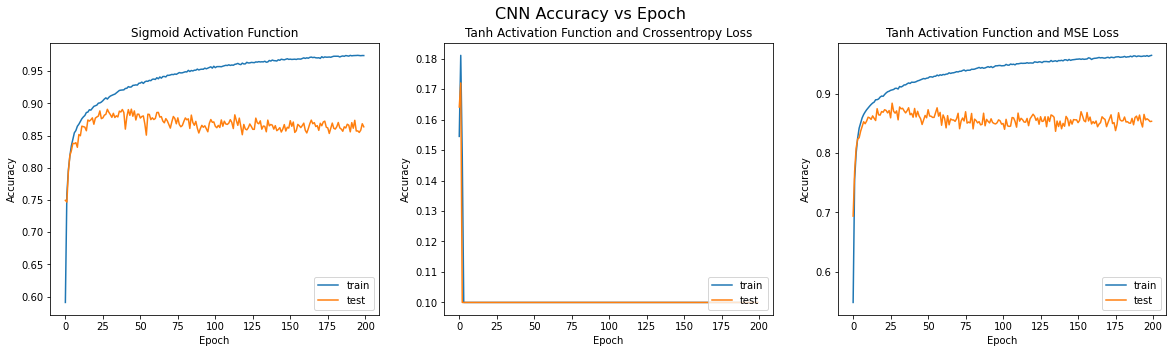

In [ ]:
#Plot accuracy vs epoch
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('CNN Accuracy vs Epoch', fontsize=16)

ax1.plot(CNN_dropout_act_sigmoid_metadata.history['accuracy'])
ax1.plot(CNN_dropout_act_sigmoid_metadata.history['val_accuracy'])
ax1.set_title('Sigmoid Activation Function')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'test'], loc='lower right')

ax2.plot(CNN_dropout_act_tanh_loss_crossentropy_metadata.history['accuracy'])
ax2.plot(CNN_dropout_act_tanh_loss_crossentropy_metadata.history['val_accuracy'])
ax2.set_title('Tanh Activation Function and Crossentropy Loss')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'test'], loc='lower right')

ax3.plot(CNN_dropout_act_tanh_loss_mse_metadata.history['accuracy'])
ax3.plot(CNN_dropout_act_tanh_loss_mse_metadata.history['val_accuracy'])
ax3.set_title('Tanh Activation Function and MSE Loss')
ax3.set_ylabel('Accuracy')
ax3.set_xlabel('Epoch')
ax3.legend(['train', 'test'], loc='lower right')

plt.show()

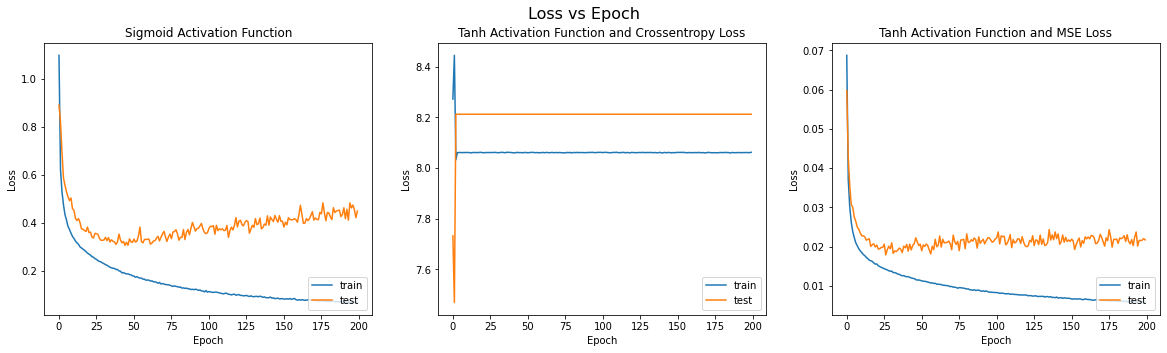

In [ ]:
#Plot loss vs epoch
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Loss vs Epoch', fontsize=16)

ax1.plot(CNN_dropout_act_sigmoid_metadata.history['loss'])
ax1.plot(CNN_dropout_act_sigmoid_metadata.history['val_loss'])
ax1.set_title('Sigmoid Activation Function')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'test'], loc='lower right')

ax2.plot(CNN_dropout_act_tanh_loss_crossentropy_metadata.history['loss'])
ax2.plot(CNN_dropout_act_tanh_loss_crossentropy_metadata.history['val_loss'])
ax2.set_title('Tanh Activation Function and Crossentropy Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'test'], loc='lower right')

ax3.plot(CNN_dropout_act_tanh_loss_mse_metadata.history['loss'])
ax3.plot(CNN_dropout_act_tanh_loss_mse_metadata.history['val_loss'])
ax3.set_title('Tanh Activation Function and MSE Loss')
ax3.set_ylabel('Loss')
ax3.set_xlabel('Epoch')
ax3.legend(['train', 'test'], loc='lower right')

plt.show()

Answer the following questions: 

1-c.   Compare the above results with softmax results (with point 5 results of Part 4-II)

  ANS:
  - Using sigmoid we achieve accuracy around 86% for test data. This was close to what we got using softmax in previous part. This shows our model is robust.
  - Training loss comes close to 0 and test loss increses after a minima to around 0.4
  
2-a.   Does ‘tanh’ as output activation work with Cross-entropy loss?

  ANS: 
  - Cross entropy loss saturates very quickly at around 8 which prevents learning and the accuracy never improves beyond 10%. So this hyperparameter tuning does not work.

  - With MSE Loss and tanh activation we notice high accuracy near 85% and and low loss near 0.2. This also shows our model is robust. 

2-b.   Give a reason why tanh is not recommended with cross entropy loss?

  ANS: Because tanh saturates very quickly and behaves like linear only for small values of x causing the gradient to saturate and effect gradient descent learning.

2-c.   Give a reason why sigmoid does not cause problem as tanh with Cross entropy loss?

  ANS: Tanh saturates very quickly and is linear only for very small values of x. With cross entropy loss we get a saturation very quickly. The gradient saturates and this effects our gradient descent learning.


# BONUS QUESTION

In [ ]:
n = 28 #Image dimension is 28x28
num_channels = 1
num_classes = 10
#Create and train model architecture
def CNN_hidden_sigmoid_tanh():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    #Dropout of 30% at the input layer
    model.add(Dropout(0.3))
    
    #First Layer - 2D Convolution layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256,(3,3), activation='sigmoid', input_shape=(n, n, num_channels)))

    #Dropout of 30% after the first hidden (first convolution) layer 
    model.add(Dropout(0.3))

    #Second Layer - 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None))

    #Third Layer - 2D Convolution layer with 128 feature maps and a 3x3 filter
    model.add(Conv2D(128,(3,3), activation='tanh'))

    #Dropout of 30% after the third hidden (second convolution) layer
    model.add(Dropout(0.3))

    #Fourth Layer - 2D MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None))

    #Fifth Layer - Flatten data for input to Dense layers
    model.add(Flatten())

    #Sixth Layer - Dense layer with 100 perceptrons
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))

    #Seventh Layer - Dense layer with 100 perceptrons
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation='softmax'))
    
    return model


#Create instance of CNN model graph
CNN_hidden_sigmoid_tanh = CNN_hidden_sigmoid_tanh()

#Compile model using an appropriate loss and optimizer algorithm
CNN_hidden_sigmoid_tanh.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_hidden_sigmoid_tanh_metadata = CNN_hidden_sigmoid_tanh.fit(data_train, labels_train,
                                                               validation_data=(data_test, labels_test),
                                                               epochs=200,
                                                               batch_size=1024,
                                                               shuffle=None)

#Print accuracy of model on testing set after training
scores = CNN_hidden_sigmoid_tanh.evaluate(data_test, labels_test)

print("Bonus Question: Testing accuracy with hidden layers as sigmoid and tanh: %.2f%%" %(scores[1]*100))
# print("Part5 Testing Accuracy with output activation as Sigmoid: %.2f%%" %(scores_act_sigmoid[1]*100))

Epoch 1/200
59/59 [==============================] - 23s 84ms/step - loss: 2.4456 - accuracy: 0.1010 - val_loss: 2.3571 - val_accuracy: 0.1000
Epoch 2/200
59/59 [==============================] - 4s 74ms/step - loss: 2.3077 - accuracy: 0.1002 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 3/200
59/59 [==============================] - 4s 74ms/step - loss: 2.3036 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/200
59/59 [==============================] - 4s 74ms/step - loss: 2.3027 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/200
59/59 [==============================] - 4s 74ms/step - loss: 2.3029 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/200
59/59 [==============================] - 4s 74ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/200
59/59 [==============================] - 4s 74ms/step - loss: 2.3027 - accuracy: 0.0961 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch

Bonus a)


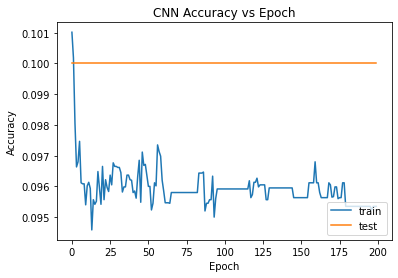

In [ ]:
#Plot accuracy vs epoch
plt.title('CNN Accuracy vs Epoch')
plt.plot(CNN_hidden_sigmoid_tanh_metadata.history['accuracy']) #Plot the training accuracy
plt.plot(CNN_hidden_sigmoid_tanh_metadata.history['val_accuracy']) #Plot the testing accuracy
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
print("Bonus a)")
plt.show()

Bonus a)


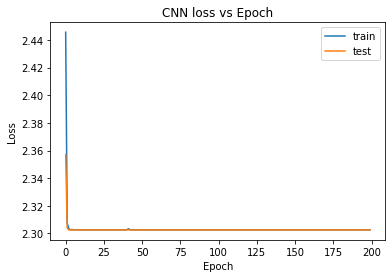

In [ ]:
#Plot loss vs epoch
plt.title('CNN loss vs Epoch')
plt.plot(CNN_hidden_sigmoid_tanh_metadata.history['loss']) #Plot the training loss
plt.plot(CNN_hidden_sigmoid_tanh_metadata.history['val_loss']) #Plot the testing loss
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
print("Bonus a)")
plt.show()

In [ ]:
### Training RELU model used in 4.II again as we add callback function to store model for every 10th epoch

n = 28 #Image dimension is 28x28
num_channels = 1
num_classes = 10
#Create and train model architecture

# Store epoch model state
class EpochSaver(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if epoch%10 == 0:  # or save after some epoch, each k-th epoch etc.
      self.model.save("model_{}.hd5".format(epoch))

def CNN_relu():
    model = Sequential()

    #Dropout of 30% at the input layer
    model.add(Dropout(0.3))
    
    #First Layer - 2D Convolution layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256,(3,3), activation='relu', input_shape=(n, n, num_channels)))

    #Dropout of 30% after the first hidden (first convolution) layer 
    model.add(Dropout(0.3))

    #Second Layer - 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None))

    #Third Layer - 2D Convolution layer with 128 feature maps and a 3x3 filter
    model.add(Conv2D(128,(3,3), activation='relu'))

    #Dropout of 30% after the third hidden (second convolution) layer
    model.add(Dropout(0.3))

    #Fourth Layer - 2D MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None))

    #Fifth Layer - Flatten data for input to Dense layers
    model.add(Flatten())

    #Sixth Layer - Dense layer with 100 perceptrons
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))

    #Seventh Layer - Dense layer with 100 perceptrons
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation='softmax'))
    
    
    return model


#Create instance of CNN model graph
CNN_relu = CNN_relu()
epoch_saver = EpochSaver()

#Compile model using an appropriate loss and optimizer algorithm
CNN_relu.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable with callbacks
CNN_relu_metadata = CNN_relu.fit(data_train, labels_train,
                                 validation_data=(data_test, labels_test),
                                 callbacks = [epoch_saver],
                                 epochs=200,
                                 batch_size=1024,
                                 shuffle=True)


Epoch 1/200
59/59 [==============================] - 6s 78ms/step - loss: 1.1193 - accuracy: 0.5835 - val_loss: 0.9356 - val_accuracy: 0.7257
INFO:tensorflow:Assets written to: model_0.hd5/assets
Epoch 2/200
59/59 [==============================] - 4s 74ms/step - loss: 0.6328 - accuracy: 0.7534 - val_loss: 0.7789 - val_accuracy: 0.7618
Epoch 3/200
59/59 [==============================] - 4s 74ms/step - loss: 0.5368 - accuracy: 0.7943 - val_loss: 0.7201 - val_accuracy: 0.7953
Epoch 4/200
59/59 [==============================] - 4s 74ms/step - loss: 0.4785 - accuracy: 0.8173 - val_loss: 0.6133 - val_accuracy: 0.8277
Epoch 5/200
59/59 [==============================] - 4s 74ms/step - loss: 0.4411 - accuracy: 0.8314 - val_loss: 0.5734 - val_accuracy: 0.8422
Epoch 6/200
59/59 [==============================] - 4s 74ms/step - loss: 0.4099 - accuracy: 0.8446 - val_loss: 0.5160 - val_accuracy: 0.8400
Epoch 7/200
59/59 [==============================] - 4s 74ms/step - loss: 0.3886 - accuracy: 0

Bonus b)


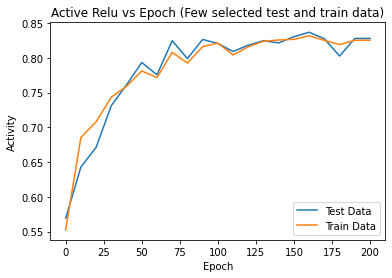

In [ ]:
evaluation_model = CNN_relu
test_data_epoch_activations = []
train_data_epoch_activations = []
test_data_ratio_active_neurons = []
train_data_ratio_active_neurons = []
image_activity = []

# Get layer output activation model for relu activation layer
def get_activation_model(model):
  model_outputs = [layer.output for layer in evaluation_model.layers if (isinstance(layer, Conv2D) or (isinstance(layer, Dense) and layer.activation.__name__=='relu'))]
  return models.Model(evaluation_model.input, model_outputs)

# Get activations at every 10th epoch
for i in range(0, 200, 10):
  evaluation_model.load_weights('model_{}.hd5'.format(i))
  activation_model = get_activation_model(evaluation_model)
  activations = activation_model.predict(data_test[0:1])
  test_data_epoch_activations.append(activations)
  activations = activation_model.predict(data_train[0:1])
  train_data_epoch_activations.append(activations)

# Get activations after training
activation_model = get_activation_model(CNN_relu)
activations = activation_model.predict(data_test[0:1])
test_data_epoch_activations.append(activations)
activations = activation_model.predict(data_train[0:1])
train_data_epoch_activations.append(activations)

# Compute ratio of active RELU neurons
def compute_active_neurons_ratio(epoch_activations, ration_active_neurons):
  for activations in epoch_activations:
    total_non_zero = 0
    total_neurons = 0
    for layer_activations in activations:
      total_non_zero += np.count_nonzero(layer_activations==0)
      total_neurons += (layer_activations.size)
    ration_active_neurons.append(total_non_zero/total_neurons)

# Compute ratio of active neurons for test data
compute_active_neurons_ratio(test_data_epoch_activations, test_data_ratio_active_neurons)
# Compute ration of active neurons for train data
compute_active_neurons_ratio(train_data_epoch_activations, train_data_ratio_active_neurons)

plt.plot(np.arange(0, 210, 10), test_data_ratio_active_neurons)
plt.plot(np.arange(0, 210, 10), train_data_ratio_active_neurons)
plt.xlabel('Epoch')
plt.ylabel('Activity')
plt.title('Active Relu vs Epoch (Few selected test and train data)')
plt.legend(['Test Data', 'Train Data'], loc = 'lower right')
print("Bonus b)")
plt.show()  

#Part 6: Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [7]:
#Download RML 2016.10b dataset and untar file
!wget --no-check-certificate https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20210919211708_5e3b34e81227750c5d986a71_a955afbc50618ea499909346e08df0f5727fc8ce_002_20210919221708_0027_dnld
!mv RML2016.10b.tar.bz2?Authorization=3_20210919211708_5e3b34e81227750c5d986a71_a955afbc50618ea499909346e08df0f5727fc8ce_002_20210919221708_0027_dnld RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

#Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat",'rb'),encoding='latin1')
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy=list(yy)
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

--2021-09-19 21:19:54--  https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20210919211708_5e3b34e81227750c5d986a71_a955afbc50618ea499909346e08df0f5727fc8ce_002_20210919221708_0027_dnld
Resolving f002.backblazeb2.com (f002.backblazeb2.com)... 206.190.215.16
Connecting to f002.backblazeb2.com (f002.backblazeb2.com)|206.190.215.16|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2?Authorization=3_20210919211708_5e3b34e81227750c5d986a71_a955afbc50618ea499909346e08df0f5727fc8ce_002_20210919221708_0027_dnld’

RML2016.10b.tar.bz2 100%[===================>]   1.16G   116MB/s    in 10s     

2021-09-19 21:20:04 (115 MB/s) - ‘RML2016.10b.tar.bz2?Authorization=3_20210919211708_5e3b34e81227750c5d986a71_a955afbc50618ea499909346e08df0f5727fc8ce_002_20210919221708_0027_dnld’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT


In [8]:
#Create and train model architecture
def cldnn():
    model = Sequential()
    
    # First Layer - 2D Convolution layer with 256 features and 1x3 filter size
    model.add(Conv2D(256, (1, 3), activation='relu', input_shape=(2, 128, 1)))

    # Dropout of 20%
    model.add(Dropout(0.2))

    # Second Layer - 2D convolution layer with 256 feature maps and 2x3 filter size
    model.add(Conv2D(256, (2,3), activation='relu'))

    # Third Layer - 2D convolution layer with 80 feature maps and 1x3 filter size
    model.add(Conv2D(80, (1,3), activation='relu'))

    # Dropout of 20% 
    model.add(Dropout(0.2))

    # Fourth Layer - 2D convolution layer with 80 feature maps and 1x3 filter size
    model.add(Conv2D(80, (1,3), activation='relu')) 

    # Reshape from 3D to 2D
    model.add(Reshape((1,-1)))

    # Fifth Layer - LSTM layer with 50 cells
    model.add(LSTM(50))

    # Sixth Layer - Dense fully connected layer with 128 perceptrons
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    return model

#Create instance of CLDNN model graph
CLDNN = cldnn()

#Compile model using an appropriate loss and optimizer algorithm
CLDNN.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CLDNN_metadata=CLDNN.fit(X_train, Y_train,
                         validation_data=(X_test, Y_test),
                         epochs=200,
                         batch_size=1024,
                         shuffle=True)

#Print accuracy of model on testing set after training 
scores = CLDNN.evaluate(X_test, Y_test)
print("Part6.1 Testing Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/200
422/422 [==============================] - 59s 93ms/step - loss: 1.6070 - accuracy: 0.3263 - val_loss: 1.1449 - val_accuracy: 0.4595
Epoch 2/200
422/422 [==============================] - 38s 89ms/step - loss: 0.8689 - accuracy: 0.5907 - val_loss: 0.6458 - val_accuracy: 0.6833
Epoch 3/200
422/422 [==============================] - 38s 89ms/step - loss: 0.5353 - accuracy: 0.7421 - val_loss: 0.4323 - val_accuracy: 0.7587
Epoch 4/200
422/422 [==============================] - 38s 89ms/step - loss: 0.4163 - accuracy: 0.7837 - val_loss: 0.3352 - val_accuracy: 0.8139
Epoch 5/200
422/422 [==============================] - 38s 89ms/step - loss: 0.3612 - accuracy: 0.8048 - val_loss: 0.3379 - val_accuracy: 0.8076
Epoch 6/200
422/422 [==============================] - 38s 89ms/step - loss: 0.3372 - accuracy: 0.8157 - val_loss: 0.3108 - val_accuracy: 0.8245
Epoch 7/200
422/422 [==============================] - 38s 89ms/step - loss: 0.3107 - accuracy: 0.8335 - val_loss: 0.3341 - val_ac

Part 6.2


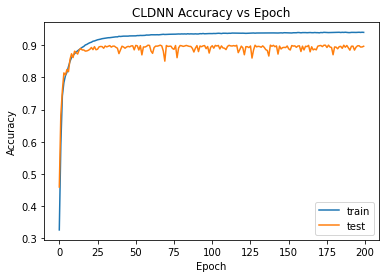

In [9]:
#Plot accuracy vs epoch
plt.title('CLDNN Accuracy vs Epoch')
plt.plot(CLDNN_metadata.history['accuracy']) #Plot the training accuracy
plt.plot(CLDNN_metadata.history['val_accuracy']) #Plot the testing accuracy
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
print("Part 6.2")
plt.show()

Part 6.3


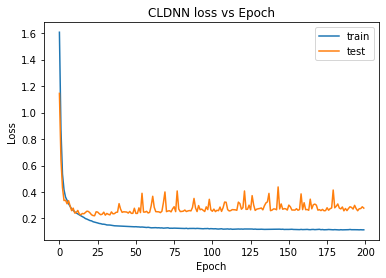

In [10]:
#Plot loss vs epoch
plt.title('CLDNN loss vs Epoch')
plt.plot(CLDNN_metadata.history['loss']) #Plot the training accuracy
plt.plot(CLDNN_metadata.history['val_loss']) #Plot the testing accuracy
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
print("Part 6.3")
plt.show()

Answer the following questions: 



1.   Is this model a good fit for the data?  

  ANS: Model gives a testing accuracy of around 90% which can be considered as a good fit and we see model loss also almost stable and low around 0.27 . Adding dropout not affects much on the testing accuracy and we can consider the model as robust.

2.   Give two ways to improve the robustness of the model.

  ANS: 
  - Using ensemble models technique by partining the data and training each of them in a separate model.

  - Distribution shift - by transforming the features and calculating accuracy for each shift.

  - We can also try feature space partioning by partioning the different features and testing on each partition.